<h1><font size = 6>MLR 503 Assignment 2 - Regression and Decision Trees</font></h1>

Submitted by: Lujain Khalil

AUS Email: g00082632@alumni.aus.edu

# Question 1

Consider the following data on experience (in years) and salary (in thousands of dollars) of a sample of employees:  

| Experience (Years)    | Salary ($1000) |
| --------              | ------- |
| 1.2                   | 42      |
| 2.5                   | 46      |
| 3.1                   | 51      |
| 3.9                   | 58      |
| 5.2                   | 62      |

1. Build a model that can help you automatically predict the salary of an employee given their years of experience. Write down the equation of your model’s hypothesis. 

2. Use your hypothesis to predict the salary of an employee with 4.5 years of experience.

3. Interpret the coefficients of your hypothesis. 

**Answer**

Considering that the data is simple and numeric, we'll fit a Linear Regression model. Let $h(x)$ be the hypothesis, where $x$ is the *Experience* in years, and $h(x)$ is the *Salary*, Then:

$$ h(x) = \beta_0 + \beta_1 * x $$

where $\beta_0$ is the intercept and $\beta_1$ is the coefficient of *Experience*. The following code will build the model and retrieve it's hypothesis.

In [32]:
import numpy as np
import pandas as pd

# initializing the data
experience = np.array([1.2, 2.5, 3.1, 3.9, 5.2])
salary = np.array([42, 46, 51, 58, 62])
employees_df = pd.DataFrame({'Experience (Years)': experience, 'Salary ($1000)': salary})

employees_df.head()

,Experience (Years),Salary ($1000)
0,1.2,42
1,2.5,46
2,3.1,51
3,3.9,58
4,5.2,62


In [33]:
from sklearn.linear_model import LinearRegression

# fitting a regression line
x = experience.reshape(-1, 1)
y = salary

model = LinearRegression()
model.fit(x, y)

print(f'B_0 = {model.intercept_}')
print(f'B_1 = {model.coef_[0]}\n')

print(f'Salary = {model.intercept_:.2f} + {model.coef_[0]:.2f} * Experience')

B_0 = 34.6475300400534
B_1 = 5.393858477970628

Salary = 34.65 + 5.39 * Experience


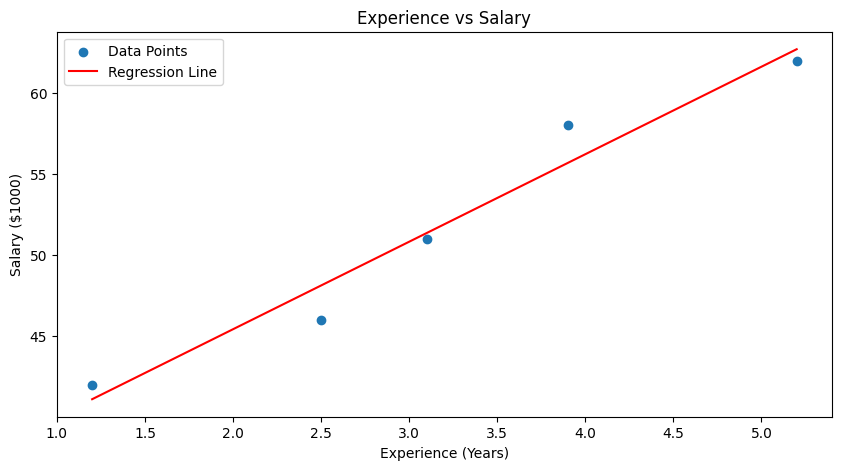

In [57]:
import matplotlib.pyplot as plt

# visualizing the data and regression line
y_pred = model.predict(x)

plt.figure(figsize=(10, 5))
plt.scatter(x, y, label="Data Points")
plt.plot(x, y_pred, color='red', label="Regression Line")

plt.xlabel("Experience (Years)")
plt.ylabel("Salary ($1000)")

plt.title("Experience vs Salary")
plt.legend()
plt.show()

In [85]:
# predicting salary for 4.5 years of experience
predicted_salary = model.predict(np.array([[4.5]]))
print(f"h(4.5) = {predicted_salary[0]:.2f}")

h(4.5) = 58.92


Our findings are as follows:

1. The equation of the model's hypothesis is as follows: 

    $$ h(x) = 34.65 + 5.39 * x $$

    where $\beta_0 = 34.65$ and $\beta_1 = 5.39$. 

2. For $x = 4.5$ years of experience, $h(x) = 58.92$ (i.e. a salary of $58.92k)

3. The intercept $\beta_0$ implies that an employee with 0 years of experience has a starting salary of \$5.39k. The coefficient $\beta_1$ implies that with every year of experinece, an employee's salary increases by \$34.65k.

# Question 2

You have the following data on size (in square feet) and number of bedrooms of 3 houses and their respective prices (in thousands of dollars): 
  
| House Number | Size (Sq. Ft.) | # of Bedrooms | Price ($100) |
| --------     | --------       | --------      | --------     |
| House 1      | 900            | 1             | 200          |
| House 2      | 1600           | 3             | 330          |
| House 3      | 1875           | 4             | 400          |

You want to build a model to automatically predict the price of a house given its size (in sq. ft.) and number of bedrooms. You decide to build your model analytically. 

1. Define your matrix $X$ and your vector $y$.

2. Solve the normal equation and write the equation of the resulting hypothesis.  

3. Predict the price of a house that is 1500 sq. ft. and has 3 bedrooms. 

4. Interpret the coefficients of your hypothesis. 

**Answer**

Let $x \in \mathbb{R}^{m \times n}$ be the feature matrix such that $n$ is the number of samples and $m$ is the number of features. Let $y \in \mathbb{R}^{n}$ be the target vector for $n$ samples. Define the hypothesis $h_w(x)$ as follows:

$$ h_w(x) = w^T x $$

where $w \in \mathbb{R}^{m}$ is the weight vector. Define a cost function $Cost(h_w(x), y)$ as the squared difference between the prediction $h_w(x)$ and true label $y$:

$$ Cost(h_w(x), y) = (h_w(x) - y)^2 $$

We can now define a function $J(w)$ to calculate the **mean sum of squared errors** as follows:

$$ J(w) = \frac{1}{2n} \sum_{i=1}^{n} Cost(h_w(x_i), y_i) $$

$$ J(w) = \frac{1}{2n} \sum_{i=1}^{n} (h_w(x_i) - y_i)^2 $$

The analytical approach of the normal equation is based on minimizing the function $J(w)$ to evaluate the optimal weight vector $w$. Setting $\frac{\partial}{\partial w} J(w) = 0$, we eventually end up with the following normal equation to evaluate $w$:

$$ w = (X^T X)^{-1} X^T y $$

The following code will evaluate the weight vector $w$ and come up with a hypothesis $h_w(x)$ specific to predicting house prices based on size and number of bedrooms.

In [1]:
import numpy as np
import pandas as pd

house_df = pd.DataFrame({
    'House number': [1, 2 , 3], 
    'Size (Sq. Ft.)': [900, 1600, 1875],
    '# of Bedrooms': [1, 3, 4],
    'Price ($1000)': [200, 330, 400]
})
house_df

,House number,Size (Sq. Ft.),# of Bedrooms,Price ($1000)
0,1,900,1,200
1,2,1600,3,330
2,3,1875,4,400


In [3]:
# defining matrices X and y
X = np.array([
    [1, 900, 1],
    [1, 1600, 3],
    [1, 1875, 4]
])
y = np.array([200, 330, 400])

print(f'X matrix: \n{X}')
print(f'shape: {X.shape}\n')

print(f'y vector: \n{y}')
print(f'shape: {y.shape}\n')

X matrix: 
[[   1  900    1]
 [   1 1600    3]
 [   1 1875    4]]
shape: (3, 3)

y vector: 
[200 330 400]
shape: (3,)



In [4]:
# solving the normal equation
w_vector = np.linalg.inv(X.T @ X) @ X.T @ y
w_0, w_1, w_2 = w_vector

for index, w in enumerate(w_vector):
    print(f'w_{index} = {w:.2f}')

print(f"\nPrice = {w_0:.2f} + {w_1:.2f} * Size + {w_2:.2f} * Bedrooms")

w_0 = 171.67
w_1 = -0.07
w_2 = 88.33

Price = 171.67 + -0.07 * Size + 88.33 * Bedrooms


In [84]:
# predicting the price of a house with 1500 sq. ft. and 3 bedrooms
def hypothesis(size, bedrooms):
    return w_0 + (w_1 * size) + (w_2 * bedrooms)

print(f'h(1500, 3) = {hypothesis(1500, 3):.2f}')

h(1500, 3) = 336.67


Our findings are as follows:

1. The matrix $X \in \mathbb{R}^{3 \times 2}$ and the vector $y \in \mathbb{R}^3$ are defined as follows:
    $$X = \begin{bmatrix} 900 & 1 \\ 1600 & 3 \\ 1875 & 4 \end{bmatrix}$$
    $$y = \begin{bmatrix} 200 \\ 330 \\ 400 \end{bmatrix}$$

    Computationally, however, $X$ is defined as $X \in \mathbb{R}^{3 \times 3}$ and $w \in \mathbb{R}^3$ to allow for calculating the intercept, where the extra column is initialized to 1's. 


2. The equation of the model's hypothesis is as follows: 

    $$ h_w(X) = 171.67 -0.07 * \text{Size} + 88.33 * \text{Bedrooms} $$

    where $w^T = \begin{bmatrix} 171.67 & -0.07 & 88.33 \end{bmatrix}$

3. For Size = 1500 and Bedrooms = 3, $h_w(X) = 336.67$ (i.e. this house costs $336.67k)

4. Interpreting the coefficient of our hypothesis:
    - The intercept $w_0$ implies that the starting price for any house is \$171.67k
    - The coefficient $w_1$ implies that a house reduces in price by \$70 per square foot. Despite this coefficient not really making sense, since house prices are supposed to increase with size, the value is too small to make any significant effect to the prediction. We could use Pearson's correlation coefficient to statistically test whether or not size is a significant predictor in our analysis.
    - The coefficient $w_2$ implies that a house costs \$88.33k per bedroom

# Question 3

You have the following data on the income (in thousands of dollars) and age of 6 individuals and whether they were approved for a credit card (1 = approved, 0 = not approved): 

| Individual Number | Income ($1000s) | Age (Years) | Approved (0 or 1) |
| --------          | --------        | --------    | --------          |
| 1                 | 45              | 25          | 0          |
| 2                 | 60              | 35          | 1          |
| 3                 | 75              | 40          | 1          |
| 4                 | 50              | 28          | 0          |
| 5                 | 90              | 50          | 1          |
| 6                 | 100             | 60          | 1          |

You want to build a model to predict whether a new applicant will be approved for a credit card given their income and age.

1. Define a suitable cost function that you will target to optimize for this problem. 

2. How many coefficients will you need to optimize in this case? 

3. Using the cost function you defined in part (a), derive the update rule for each coefficient that needs to be optimized. Show your work by deriving the expression for the derivative of the cost function with respect to each coefficient. 

4. Assuming an initial value of 1 for the first coefficient, 2 for the second coefficient, 3 for the third coefficient, 4 for the fourth coefficient, and so on, run one iteration of gradient descent using a learning rate of 0.01. 

5. Calculate the model accuracy using the updated coefficients.

**Answers**

##### 1. Define a suitable cost function that you will target to optimize for this problem. 

Since we're dealing with a binary classification problem, logistic regression is the most appropriate approach. Let $w \in \mathbb{R}^m$ be the weight vector and $x \in \mathbb{R}^{m \times n}$ be the feature matrix. The hypothesis $h_w(x)$ is defined as the following sigmoid function:

$$ h_w(x) = \sigma(w^T x) = \frac{1}{1 + e^{-w^T x}} $$

where $m$ is the number of features and $n$ is the number of samples in the dataset. Define a cost function $Cost(h_w(x), y)$ as the **binary cross-entropy loss**:

$$ Cost(h_w(x), y) = \begin{cases} -log(h_w(x)) &\text{if }y = 1 \\ -log(1-h_w(x)) &\text{if }y = 0 \end{cases} $$
$$ Cost(h_w(x), y) = -y \cdot log(h_w(x)) - (1-y) \cdot log(1 - h_w(x))$$

where $y \in \mathbb{R}^n$ is the vector of expected classes. We can now define a function $J(w)$ to calculate the **mean binary cross-entropy loss** as follows:

$$ J(w) = \frac{1}{n} \sum_{i=1}^{n} Cost(h_w(x_i), y_i) $$

$$ J(w) = -\frac{1}{n} \sum_{i=1}^{n} y_i \cdot log(h_w(x_i)) + (1-y_i) \cdot log(1 - h_w(x_i)) $$

##### 2. How many coefficients will you need to optimize in this case?

With $m = 2$ corresponding to 2 input features (Income and Age) plus an intercept term, we will have a total of **3 coefficients to optimize**

##### 3. Using the cost function you defined in part (a), derive the update rule for each coefficient that needs to be optimized. Show your work by deriving the expression for the derivative of the cost function with respect to each coefficient. 

We start with our defined cost function $J(w)$ and our hypothesis $h_w(x)$ from part (a):

$$ J(w) = -\frac{1}{n} \sum_{i=1}^{n} y_i \cdot log(h_w(x_i)) + (1-y_i) \cdot log(1 - h_w(x_i)) $$

$$h_w(x) = \sigma(w^T x) = \frac{1}{1 + e^{-w^T x}}$$

where $n$ is the sample size, $y \in \mathbb{R}^n$ is the vector of true labels, $x \in \mathbb{R}^{m \times n}$ is the feature matrix, and $w \in \mathbb{R}^m$ is the weight vector.

The gradient descent update rule for each $w_j \in w$ such that $j \in [0, m)$ is as follows:

$$ w_j := w_j - \alpha \frac{\partial}{\partial w_j} J(w) $$

where $\alpha$ is the learning rate and $\frac{\partial}{\partial w_j} J(w)$ is the partial derivative of $J(w)$ with respect to $w_j$. 

To evaluate $\frac{\partial}{\partial w_j} J(w)$, let's start with substituing $h_w(x_i)$ with $\sigma(w^T x_i)$ in the $J(w)$ equation:

$$ J(w) = -\frac{1}{n} \sum_{i=1}^{n} y_i \cdot log(\sigma(w^T x_i)) + (1-y_i) \cdot log(1 - \sigma(w^T x_i)) $$

Evaluating $\frac{\partial}{\partial w_j} J(w)$, we get:

$$ \frac{\partial}{\partial w_j} J(w) = -\frac{1}{n} \sum_{i=1}^{n} y_i \cdot \boldsymbol{\frac{\partial}{\partial w_j} log(\sigma(w^T x_i))} + (1-y_i) \cdot \boldsymbol{\frac{\partial}{\partial w_j} log(1 - \sigma(w^T x_i))} $$

Now we need to evaluate $\frac{\partial}{\partial w_j} log(\sigma(w^T x_i))$ and $\frac{\partial}{\partial w_j} log(1 - \sigma(w^T x_i))$. We know that for any logarithmic function $log(f(x))$, the derivative is as follows:

$$ \frac{\partial}{\partial x} log(f(x)) = \frac{f'(x)}{f(x)}$$
$$ \implies \frac{\partial}{\partial w_j} log(\sigma(w^T x)) = \frac{\sigma'(w^T x)}{\sigma(w^T x)}$$

Similarly, for $\frac{\partial}{\partial w_j} log(1 - \sigma(w^T x_i))$, we get:

$$ \frac{\partial}{\partial x} log(1 - f(x)) = \frac{-f'(x)}{1 - f(x)}$$
$$ \implies \frac{\partial}{\partial w_j} log(1 - \sigma(w^T x)) = \frac{- \sigma'(w^T x)}{1 - \sigma(w^T x)}$$

For any sigmoid function $\sigma(z)$, the derivative is as follows:

$$ \sigma'(z) = \sigma(z) (1 - \sigma(z)) \cdot z' $$
$$ \implies \frac{\partial}{\partial w_j} \sigma(w^T x) = \sigma(w^T x) (1 - \sigma(w^T x)) \cdot \frac{\partial (w^T x)}{\partial w_j} $$
$$ \implies \frac{\partial}{\partial w_j} \sigma(w^T x) = \sigma(w^T x) (1 - \sigma(w^T x)) \cdot x_j $$

Evaluating for $\frac{\partial}{\partial w_j} log(\sigma(w^T x_i))$:

$$ \frac{\partial}{\partial w_j} log(\sigma(w^T x)) = \frac{\sigma(w^T x) (1 - \sigma(w^T x)) \cdot x_j}{\sigma(w^T x)}$$
$$ \implies \frac{\partial}{\partial w_j} log(\sigma(w^T x)) = (1 - \sigma(w^T x)) \cdot x_j$$

Similarly evaluating for $\frac{\partial}{\partial w_j} log(1 - \sigma(w^T x_i))$:

$$ \frac{\partial}{\partial w_j} log(1 - \sigma(w^T x)) = \frac{- \sigma(w^T x) (1 - \sigma(w^T x)) \cdot x_j}{1 - \sigma(w^T x)}$$
$$ \implies \frac{\partial}{\partial w_j} log(1 - \sigma(w^T x)) = - \sigma(w^T x) \cdot x_j$$

Substituing the evaluated $\frac{\partial}{\partial w_j} log(\sigma(w^T x))$ and $\frac{\partial}{\partial w_j} log(1 - \sigma(w^T x))$ into $\frac{\partial}{\partial w_j} J(w)$, we get:

$$ \frac{\partial}{\partial w_j} J(w) = -\frac{1}{n} \sum_{i=1}^{n} y_i \cdot (1 - \sigma(w^T x_i)) \cdot x_{ij} + (1-y_i) \cdot (- \sigma(w^T x_i)) \cdot x_{ij} $$

Simplifying $\frac{\partial}{\partial w_j} J(w)$, we end up with the following equation:

$$ \frac{\partial}{\partial w_j} J(w) = \frac{1}{n} \sum_{i=1}^{n} (\sigma(w^T x_i) - y_i) \cdot x_{ij} $$

Finally, the update rule for each coefficient $w_j \in w$ such that $j \in [0, m)$ is as follows: 

$$ w_j := w_j - \alpha \frac{1}{n} \sum_{i=1}^{n} (\sigma(w^T x_i) - y_i) \cdot x_{ij} $$

##### 4. Assuming an initial value of 1 for the first coefficient, 2 for the second coefficient, 3 for the third coefficient, 4 for the fourth coefficient, and so on, run one iteration of gradient descent using a learning rate of 0.01. 

In [114]:
import numpy as np

# defining X feature matrix with income, age, and approved status
X = np.array([
    [1, 45, 25],
    [1, 60, 35],
    [1, 75, 40],
    [1, 50, 28],
    [1, 90, 50],
    [1, 100, 60]
])
y = np.array([0, 1, 1, 0, 1, 1])

print(f'X matrix: \n{X}')
print(f'shape: {X.shape}\n')

print(f'y vector: \n{y}')
print(f'shape: {y.shape}')

X matrix: 
[[  1  45  25]
 [  1  60  35]
 [  1  75  40]
 [  1  50  28]
 [  1  90  50]
 [  1 100  60]]
shape: (6, 3)

y vector: 
[0 1 1 0 1 1]
shape: (6,)


In [104]:
# initial coefficients, learning rate, and sample size
w = np.array([1.0, 2.0, 3.0])
learning_rate = 0.01
n = len(y) 

# sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# hypothesis
hyp = sigmoid(X @ w)

# gradient of J(w)
gradient = (1 / n) * (X.T @ (hyp - y))

# update rule
w_updated = w - (learning_rate * gradient)

print(f'Initial weight vector: {w}')
print(f'Updated weight vector: {w_updated}')

Initial weight vector: [1. 2. 3.]
Updated weight vector: [0.99666667 1.84166667 2.91166667]


After one gradient descent update, the coefficients are as follows:
- $w_0 = 0.997$
- $w_1 = 1.842$ 
- $w_2 = 2.912$ 

##### 5. Calculate the model accuracy using the updated coefficients.

In [112]:
# getting predictions with initial weights
hyp = sigmoid(X @ w)

# converting probabilities to binary outputs
y_pred = (hyp >= 0.5).astype(int)

# calculating accuracy
accuracy = np.mean(y_pred == y) * 100
print(f'Accuracy with initial weights = {accuracy:.2f}%')

Accuracy with initial weights = 66.67%


In [113]:
# getting predictions with updated weights
hyp_updated = sigmoid(X @ w_updated)

# converting probabilities to binary outputs
y_pred_updated = (hyp_updated >= 0.5).astype(int)

# calculating accuracy
accuracy_updated = np.mean(y_pred_updated == y) * 100
print(f'Accuracy after first update = {accuracy_updated:.2f}%')

Accuracy after first update = 66.67%


We can observe that the accuracy did not improve much after the first weight update. Many more iterations will be required for a better model.

# Question 4

You built a model that can predict whether a customer would churn (i.e., leave the company) (1 = churn, 0 = no churn) using a number of features, with one them being $x$ (salary – in thousands of dollars). In the dataset you leveraged to build the model, only 10% of the customers churned. The remaining 90% did not churn. The confusion matrix for applying the model to a test set is as follows: 

| Actual\Predicted | No Churn (0) | Churn (1) |
| --------         | --------     | --------  | 
| **No Churn (0)** | 180          | 20        |
| **Churn (1)**    | 70           | 30        |

1. Calculate the accuracy, precision, recall, and F1 score for the model. 

2. Interpret the F1 score and explain when it is more useful than accuracy. 

3. Suppose the coefficient corresponding to the feature “salary” in the model you built is −0.6. For an employee with a salary of $30,000, the probability of churning is 0.63. What would the probability of churning be if the company were to increase this employee's salary to $31,000?

**Answers**

In [118]:
TP = 30
TN = 180
FP = 20
FN = 70

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f'Accuracy = {accuracy}')
print(f'Precision = {precision}')
print(f'Recall = {recall}')
print(f'F1-Score = {f1_score}')

Accuracy = 0.7
Precision = 0.6
Recall = 0.3
F1-Score = 0.4


Define the hypothesis for a logistic regression model as follows:

$$ h_w(x) = \sigma(w^T x)$$
$$ h_w(x) = \frac{1}{1 + e^{-w^T x}} $$

Let $w^T = [\beta_0 \beta_1]$, then:

$$ h_w(x) = \sigma(\beta_0 + \beta_1 x)$$
$$ h_w(x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x)}}$$

Given that $\beta_0 = -0.6$, we can then define $h_w(x)$ as:

$$ h_w(x) = \frac{1}{1 + e^{-(-0.6 + \beta_1 x)}}$$

Given that $h_w(30) = 0.63$, we can compute $\beta_0 + \beta_1 x$ as follows:

$$ \beta_0 + \beta_1 x = ln(\frac{h_w(x)}{1 - h_w(x)})$$

The following code computes $\beta_1$:

In [124]:
import numpy as np

hyp = 0.63 
B0 = -0.6
x = 30    

logit = np.log(hyp / (1 - hyp))

B1 = (logit - B0) / x
print(f'beta_1 = {B1:.4f}')

beta_1 = 0.0377


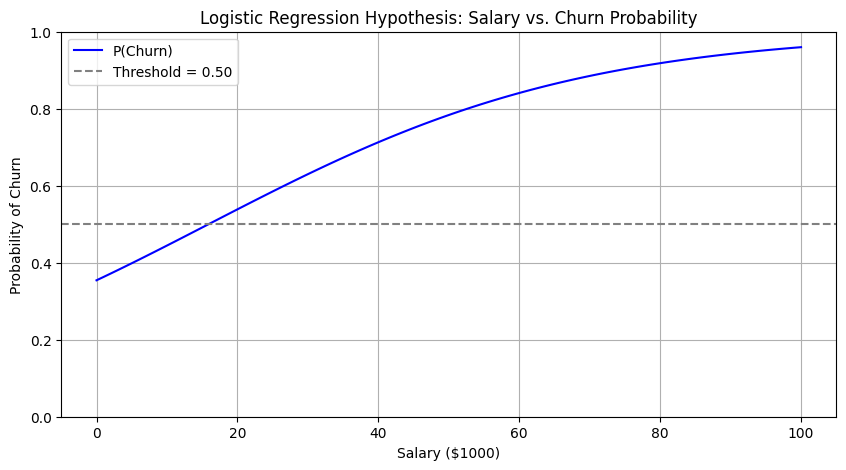

In [132]:
salary_range = np.linspace(0, 100, 100) 

prob_churn = 1 / (1 + np.exp(-(B0 + B1 * salary_range)))

plt.figure(figsize=(10, 5))
plt.plot(salary_range, prob_churn, label="P(Churn)", color="blue")

plt.axhline(0.5, color="grey", linestyle="--", label="Threshold = 0.50")
plt.xlabel("Salary ($1000)")
plt.ylabel("Probability of Churn")

plt.title("Logistic Regression Hypothesis: Salary vs. Churn Probability")
plt.ylim(0, 1)

plt.legend()
plt.grid(True)
plt.show()

In [134]:
x = 31
prob = 1 / (1 + np.exp(-(B0 + B1 * x)))

print(f'P(Churn) when x = 30: {prob:.3f}')

P(Churn) when x = 30: 0.639


Our findings are as follows:

1. Evaluation metrics:
    - Accuracy = 0.7
    - Precision = 0.6
    - Recall = 0.3
    - F1-Score = 0.4

2. Mathemtically, an F1-Score of 0.40 implies that the harmonic mean of the model's precision and recall is 0.40. This implies that the model's performance is a little less than adequate. F1-Score is a lot more useful than accuracy, especially when it comes to imblanaced datasets like this one. Despite the model being able to correctly classify 70% of the full data, it still is not able to adequately detect customers that would churn, as indicated by a very low recall of 30%.

3. Given that $h_w(x) = \sigma(-0.6 + 0.0377 x)$, then $h_w(31) = 0.639$

# Question 5

You want to automatically decide whether today would be a good day to play tennis or not based on the day’s outlook, temperature, and humidity. You have some recorded historical data, as shown below: 

| Outlook  | Temperature | Humidity | Play Tennis |
| -------- | --------    | -------- | --------    |
| Sunny    | Hot         | High     | No          |
| Sunny    | Hot         | Normal   | Yes         |
| Overcast | Hot         | High     | Yes         |
| Overcast | Mild        | High     | Yes         |
| Sunny    | Mild        | Normal   | No          |

1. Using entropy as the measure of impurity at each node, build a decision tree classifier that can predict whether today would be a good day to play tennis or not based on 
outlook, temperature, and humidity. Recall that entropy is calculated as, 

    $$H(p_1) = - \sum_{i=1}^{n} p_i log_2(p_i)$$

    where $p$ is the fraction of datapoints belonging to class 1 (Yes to Playing Tennis). 

2. Use the decision tree classifier to predict whether to play tennis or not for a day with the following features: 
    - Outlook: Overcast 
    - Temperature: Hot 
    - Humidity: Normal 

**Answers**

In [135]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import matplotlib.pyplot as plt

weather_df = {
    "Outlook": ["Sunny", "Sunny", "Overcast", "Overcast", "Sunny"],
    "Temperature": ["Hot", "Hot", "Hot", "Mild", "Mild"],
    "Humidity": ["High", "Normal", "High", "High", "Normal"],
    "Play Tennis": ["No", "Yes", "Yes", "Yes", "No"]
}
weather_df = pd.DataFrame(weather_df)
weather_df.head()

,Outlook,Temperature,Humidity,Play Tennis
0,Sunny,Hot,High,No
1,Sunny,Hot,Normal,Yes
2,Overcast,Hot,High,Yes
3,Overcast,Mild,High,Yes
4,Sunny,Mild,Normal,No


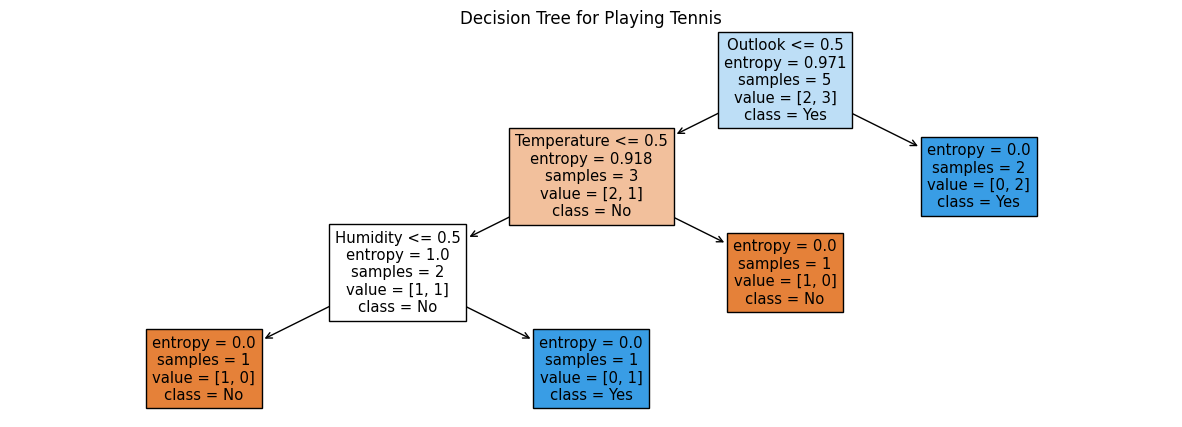

In [141]:
# encoding categorical features
weather_df_encoded = weather_df.copy()
weather_df_encoded["Outlook"] = weather_df["Outlook"].map({"Sunny": 0, "Overcast": 1})
weather_df_encoded["Temperature"] = weather_df["Temperature"].map({"Hot": 0, "Mild": 1})
weather_df_encoded["Humidity"] = weather_df["Humidity"].map({"High": 0, "Normal": 1})
weather_df_encoded["Play Tennis"] = weather_df["Play Tennis"].map({"No": 0, "Yes": 1})

X = weather_df_encoded[["Outlook", "Temperature", "Humidity"]]
y = weather_df_encoded["Play Tennis"]

tree_clf = DecisionTreeClassifier(criterion="entropy")
tree_clf.fit(X, y)

plt.figure(figsize=(15, 5))
plot_tree(tree_clf, feature_names=["Outlook", "Temperature", "Humidity"], class_names=["No", "Yes"], filled=True)
plt.title("Decision Tree for Playing Tennis")
plt.show()

The input data will be encoded as follows:
- Outlook: Overcast -> 1
- Temperature: Hot -> 0
- Humidity: Normal -> 1

In [144]:
x = pd.DataFrame([[1, 0, 1]], columns=["Outlook", "Temperature", "Humidity"])
y_pred = tree_clf.predict(x)

print(f'Prediction: {y_pred[0] == 1}')

Prediction: True


Given that the weather outlook is 'overcast', temperature is 'hot', and humidity is 'normal, the decision tree classifier estimates that it is good weather to play tennis outside.